In [1]:
!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 6.5 MB/s 


In [2]:
# константы задачи
BOUND_LOW, BOUND_UP = -5.12, 5.12 # границы, одинаковые для всех измерений
N = 2 # параметр функции Растригина

In [15]:
# конастанты ЭС
MAX_GENERATIONS = 3000
DEVIATION = 0.5 # отклонение (sigma)

In [ ]:
np.random.normal(0, 0.0001, 30)

In [4]:
def randomFloat(low, up):
  return [random.uniform(l, u) for l, u in zip([low] * N, [up] * N)]

In [5]:
def randomIndividual(low, up):
  return (randomFloat(low, up), [DEVIATION for i in range(N)])
print(randomIndividual(low=BOUND_LOW, up=BOUND_UP))

([3.019124084456956, -1.381961209238424], [0.5, 0.5])


In [6]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,), sigma=DEVIATION, bounds=(BOUND_LOW, BOUND_UP))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("randomIndividual", randomFloat, low=BOUND_LOW, up=BOUND_UP)
toolbox.register("populationCreator", tools.initIterate, creator.Individual, toolbox.randomIndividual)

In [7]:
def f(x):
  return 10.0 * N + sum([xi*xi - 10.0 * np.cos(2.0*np.pi*xi) for xi in x])

In [8]:
def rastrigins(individual):
  #print("x = {}, f(x) = {}".format(individual, f(individual)))
  return f(individual),
toolbox.register("evaluate", rastrigins)

In [9]:
def from_bounds(x, sigma, low, up):
  while True:
    xt = x + np.random.normal(0, sigma)
    if (xt > low and xt < up):
      return xt

def mutate(individual):
  sigma = individual.fitness.sigma
  low, up = individual.fitness.bounds
  size = len(individual)
  for i in range(size):
    individual[i] = from_bounds(individual[i], sigma, low, up)
  return individual
toolbox.register('mutate', mutate)

In [10]:
def twoFoldAES(max_gen = MAX_GENERATIONS, verbose=False):
  population = toolbox.populationCreator();
  population.fitness.values = toolbox.evaluate(population)

  generations_counter = 0
  successful_mutations_counter = 0
  minFitnessValues = []

  while generations_counter < max_gen:
    generations_counter += 1

    child = toolbox.mutate(toolbox.clone(population))
    child.fitness.values = toolbox.evaluate(child)

    #print(population.fitness.values[0], child.fitness.values[0],)
    if (child.fitness.values[0] < population.fitness.values[0]):
      del population
      population = child
      successful_mutations_counter += 1

    if False:
      success_rate =  successful_mutations_counter / generations_counter
      population.fitness.sigma *= (
          0.82 if success_rate < 0.2 else
          1.22 if success_rate > 0.2 else
          1
      )

    minFitnessValues.append(population.fitness.values[0])

    if (verbose == True):
      print("- Поколение {}: Приспособ. = {}"
        .format(generations_counter, population.fitness.values[0], population.fitness.sigma, population))

  return minFitnessValues


In [ ]:
a = twoFoldAES(max_gen=5000, verbose=True)

In [11]:
def avgAES(n=5):
  vals = []
  minVals = []
  for i in range(n):
    vals.append(twoFoldAES());
    minVals.append(vals[i][-1]);
    # print(minVals)
  return sum(minVals) / n, vals[0]

In [ ]:
avgAES(30)

1 0.00541990473383791
0.1 0.008339285761883275
0.01 0.013709990215571111
0.001 0.01772615021626862
0.0001 0.005351986715308499
1e-05 0.007408679893192982
1e-06 0.011079254475783529
1e-07 0.005925419472544746
1e-08 0.011900460059520413
1e-09 0.014966303916808954


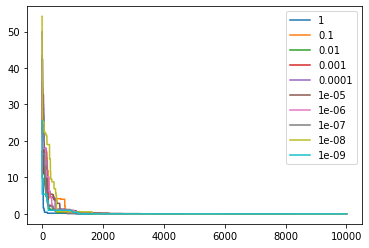

In [19]:
%matplotlib inline

vals = []
sigmas = []
for sigma in range(0, 10):
  SIGMA = 10 ** -sigma
  avgVal, minVals  = avgAES(5)
  print(SIGMA, avgVal)
  sigmas.append(SIGMA)
  plt.plot(minVals, label=SIGMA)

# fig, axs = plt.subplots()
# axs.bar(sigmas, vals)
# counts, bins = np.histogram(vals)
# plt.hist(bins[:-1], bins, weights=counts)
# # plt.hist(minValues[-1], label=sigma)

plt.legend()
plt.show()

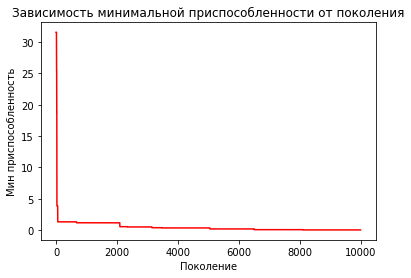

In [ ]:
plt.plot(minValues, color='red')
plt.xlabel("Поколение")
plt.ylabel('Мин приспособленность')

plt.title('Зависимость минимальной приспособленности от поколения')
plt.show()